In [3]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [5]:
(X_train , y_train),(X_test , y_test)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
len(X_train)

60000

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

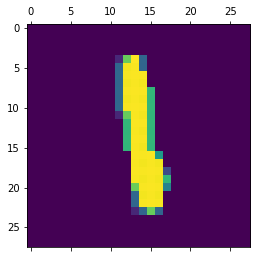

In [9]:
plt.matshow(X_train[200])

In [10]:
y_train[200]

1

In [22]:
# X_train.shape
X_test.shape

(10000, 28, 28)

In [23]:
X_train_flat = X_train.reshape(len(X_train),28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)
X_train_flat.shape
X_test_flat.shape

(10000, 784)

In [25]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam' , 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 10.0517 - accuracy: 0.8383
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.0878 - accuracy: 0.8799
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6710 - accuracy: 0.8834
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6271 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4911 - accuracy: 0.8862


In [ ]:
# divide X_train by 255 to scale values to improve accuracy

In [26]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 6.4279 - accuracy: 0.8777


[6.427871227264404, 0.8776999711990356]

In [32]:
y_predicted = model.predict(X_test_flat)
y_predicted[100]

313/313 [==============================] - 0s 971us/step


array([1.7525373e-17, 2.4029742e-11, 1.0000000e+00, 1.0000000e+00,
       5.1615432e-37, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       1.1420769e-03, 2.4931309e-31], dtype=float32)

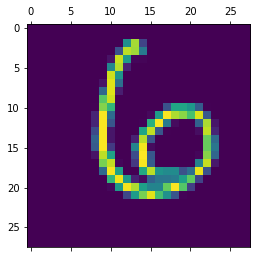

In [33]:
plt.matshow(X_test[100])

In [34]:
np.argmax(y_predicted)

3

In [35]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[3, 0, 1, 0, 0]

In [37]:
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 979,    0,    0,    0,    1,    0,    0,    0,    0,    0],
       [  22, 1110,    2,    0,    0,    1,    0,    0,    0,    0],
       [ 463,  244,  322,    2,    1,    0,    0,    0,    0,    0],
       [ 391,  219,  333,   67,    0,    0,    0,    0,    0,    0],
       [ 188,  118,  281,  148,  247,    0,    0,    0,    0,    0],
       [ 516,   48,  147,  112,   27,   40,    2,    0,    0,    0],
       [ 337,   42,  558,   10,    3,    8,    0,    0,    0,    0],
       [ 156,  144,  270,  437,   13,    3,    0,    5,    0,    0],
       [ 303,  348,  272,   27,    7,   17,    0,    0,    0,    0],
       [  93,  103,  190,  497,  123,    1,    0,    2,    0,    0]])>

Text(69.0, 0.5, 'Truth')

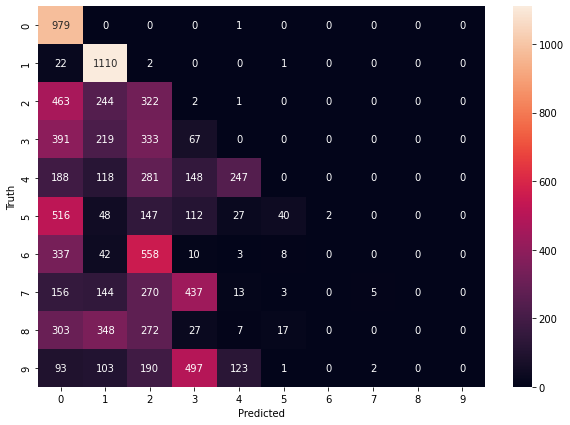

In [38]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
